**Import Repositories**

In [382]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

**Read the data set**

In [383]:
# Load csv dataset
df = pd.read_csv("/content/ADHD.csv", encoding='ISO-8859-1')

# **Data Understanding**

### Basic Overview of the dataset

In [384]:
df.head()

,age,sex,specify,home_language,have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,if_yes_please_list_these_difficulties_and_or_symptoms,if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started,have_you_ever_been_diagnosed_with_a_mental_illness,if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses,was_this_diagnosis_made_before_or_after_you_left_high_school,if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this,have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one,are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one,have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one,are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one,bdi1_item_1,bdi1_item_2,bdi1_item_3,bdi1_item_4,bdi1_item_5,bdi1_item_6,bdi1_item_7,bdi1_item_8,bdi1_item_9,bdi1_item_10,bdi1_item_11,bdi1_item_12,bdi1_item_13,bdi1_item_14,bdi1_item_15,bdi1_item_16,bdi1_item_17,bdi1_item_18,bdi1_item_19,bdi1_item_20,bdi1_item_21,bdi1_total,audit1_item_1,audit1_item_2,audit1_item_3,audit1_item_4,audit1_item_5,audit1_item_6,audit1_item_7,audit1_item_8,audit1_item_9,audit1_total,aas1_item_1,aas1_item_2,aas1_item_3,aas1_item_4,aas1_item_5,aas1_item_6,aas1_item_7,aas1_item_8,aas1_item_9,aas1_total,psy1004_grade,nbt_completed,nbt_year,nbt_al,nbt_math,nbt_ql,nbt_ave,nbt_did_math,nbt_alql_ave,matric_mark,asrs1_item_1,asrs1_item_2,asrs1_item_3,asrs1_item_4,asrs1_item_5,asrs1_item_6,asrs1_item_7,asrs1_item_8,asrs1_item_9,asrs1_item_10,asrs1_item_11,asrs1_item_12,asrs1_item_13,asrs1_item_14,asrs1_item_15,asrs1_item_16,asrs1_item_17,asrs1_item_18,asrs1_total.x,bai1_item_1,bai1_item_2,bai1_item_3,bai1_item_4,bai1_item_5,bai1_item_6,bai1_item_7,bai1_item_8,bai1_item_9,bai1_item_10,bai1_item_11,bai1_item_12,bai1_item_13,bai1_item_14,bai1_item_15,bai1_item_16,bai1_item_17,bai1_item_18,bai1_item_19,bai1_item_20,bai1_item_21,bai1_total,asrs1_total.y,aas_change,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114
0,22,female,NaN,xitsonga,no,na,na,no,na,not applicable,na,not applicable,not applicable,not applicable,not applicable,3,0,0,1,2,3,1,2,0,1,0,3,0,0,2,1,0,3,0,2,0,24,0,0,0,0,0,0,0,0,0,0,2.0,4.0,5.0,2.0,3.0,1.0,5.0,5,5.0,32,65,yes,2022,57,67,44,56,yes,50.5,84,1,1,1,2,0,0,1,3,2,1,3,0,2,0,1,0,0,1,19,2,3,1,3,3,3,3,3,3,3,1,1,1,3,0,0,3,1,3,1,3,44,44.0,-0.112652,NaN,NaN,NaN,NaN,NaN
1,21,male,NaN,english,no,none,none,no,none,not applicable,none,not applicable,not applicable,not applicable,not applicable,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,0,0,0,0,0,4,5.0,1.0,2.0,4.0,4.0,4.0,5.0,5,5.0,35,67,yes,2022,82,0,64,73,no,73.0,66,2,2,1,3,3,3,3,2,1,1,1,0,2,1,1,1,2,2,31,0,2,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,6,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2,19,female,NaN,isizulu,yes,mental breakdowns. anxiety. panic attacks,15,not formally diagnosed,adhd,before,14,yes,no,no,no,1,0,1,1,0,0,0,1,0,3,3,1,1,1,1,1,1,1,2,1,0,20,1,0,0,0,0,2,3,4,4,14,4.0,1.0,5.0,1.0,1.0,3.0,5.0,5,5.0,30,56,yes,2022,58,0,41,50,no,49.5,69,2,3,2,1,2,3,3,3,3,4,4,4,4,2,4,4,3,1,52,1,3,1,3,3,2,1,1,3,2,1,2,0,3,0,0,1,0,0,0,2,28,29.0,NaN,NaN,NaN,NaN,NaN,NaN
3,20,male,NaN,afrikaans/english,yes,"depression and anxiety, as well as adhd",16,"yes, formally diagnosed by a doctor or mental ...",depression and adhd,after,18,yes,yes,yes,yes,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,2,0,0,1,10,3,1,3,1,0,1,1,4,0,14,4.0,1.0,5.0,3.0,1.0,3.0,3.0,3,1.0,24,76,yes,2022,87,0,89,88,NaN,88.0,80,2,2,1,3,4,3,3,3,3,1,3,0,4,3,1,2,2,1,41,0,3,2,3,2,0,2,0,0,2,0,1,0,0,1,2,1,1,0,1,2,23,23.0,-2.244203,NaN,NaN,NaN,NaN,NaN
4,20,female,NaN,isixhosa,no,none,none,no,NaN,not applicable,NaN,no,no,no,no,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,2,1,0,7,0,0,0,0,0,0,0,0,0,0,3.0,1.0,2.0,1.0,4.0,4.0,5.0,5,5.0,30,59,yes,2022,55,92,56,68,yes,55.5,77,1,1,1,2,0,2,3,1,0,3,3

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 115 entries, age to Unnamed: 114
dtypes: float64(16), int64(83), object(16)
memory usage: 454.7+ KB


In [386]:
print(df.dtypes.to_string())


age                                                                                                                                int64
sex                                                                                                                               object
specify                                                                                                                           object
home_language                                                                                                                     object
have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school     object
if_yes_please_list_these_difficulties_and_or_symptoms                                                                             object
if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started                  object
have_you_ever_been_diagnosed_with_a_menta

In [387]:
df.shape

(506, 115)

In [388]:
# check for null data columns
print(df.isnull().sum().to_string())


age                                                                                                                                0
sex                                                                                                                                0
specify                                                                                                                          495
home_language                                                                                                                      0
have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school      0
if_yes_please_list_these_difficulties_and_or_symptoms                                                                             81
if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started                  77
have_you_ever_been_diagnosed_with_a_mental_illness                   

In [389]:
print(df.columns.tolist())


['age', 'sex', 'specify', 'home_language', 'have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school', 'if_yes_please_list_these_difficulties_and_or_symptoms', 'if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started', 'have_you_ever_been_diagnosed_with_a_mental_illness', 'if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses', 'was_this_diagnosis_made_before_or_after_you_left_high_school', 'if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this', 'have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'bd

In [390]:
# drop unwanted columns
df = df.drop(['specify', 'home_language', 'if_yes_please_list_these_difficulties_and_or_symptoms', 'have_you_ever_been_diagnosed_with_a_mental_illness', 'if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started', 'if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses', 'was_this_diagnosis_made_before_or_after_you_left_high_school', 'if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this', 'have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'bdi1_item_1', 'bdi1_item_2', 'bdi1_item_3', 'bdi1_item_4', 'bdi1_item_5', 'bdi1_item_6', 'bdi1_item_7', 'bdi1_item_8', 'bdi1_item_9', 'bdi1_item_10', 'bdi1_item_11', 'bdi1_item_12', 'bdi1_item_13', 'bdi1_item_14', 'bdi1_item_15', 'bdi1_item_16', 'bdi1_item_17', 'bdi1_item_18', 'bdi1_item_19', 'bdi1_item_20', 'bdi1_item_21', 'audit1_item_1', 'audit1_item_2', 'audit1_item_3', 'audit1_item_4', 'audit1_item_5', 'audit1_item_6', 'audit1_item_7', 'audit1_item_8', 'audit1_item_9', 'aas1_item_1', 'aas1_item_2', 'aas1_item_3', 'aas1_item_4', 'aas1_item_5', 'aas1_item_6', 'aas1_item_7', 'aas1_item_8', 'aas1_item_9', 'psy1004_grade', 'nbt_completed', 'nbt_year', 'nbt_al', 'nbt_math', 'nbt_ql', 'nbt_ave', 'nbt_did_math', 'nbt_alql_ave', 'asrs1_item_1', 'asrs1_item_2', 'asrs1_item_3', 'asrs1_item_4', 'asrs1_item_5', 'asrs1_item_6', 'asrs1_item_7', 'asrs1_item_8', 'asrs1_item_9', 'asrs1_item_10', 'asrs1_item_11', 'asrs1_item_12', 'asrs1_item_13', 'asrs1_item_14', 'asrs1_item_15', 'asrs1_item_16', 'asrs1_item_17', 'asrs1_item_18', 'bai1_item_1', 'bai1_item_2', 'bai1_item_3', 'bai1_item_4', 'bai1_item_5', 'bai1_item_6', 'bai1_item_7', 'bai1_item_8', 'bai1_item_9', 'bai1_item_10', 'bai1_item_11', 'bai1_item_12', 'bai1_item_13', 'bai1_item_14', 'bai1_item_15', 'bai1_item_16', 'bai1_item_17', 'bai1_item_18', 'bai1_item_19', 'bai1_item_20', 'bai1_item_21', 'asrs1_total.y', 'aas_change', 'Unnamed: 110', 'Unnamed: 111', 'Unnamed: 112', 'Unnamed: 113', 'Unnamed: 114'],axis=1)

In [391]:
print("Columns after dropping:")
print("\n".join(df.columns.tolist()))


Columns after dropping:
age
sex
have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school
bdi1_total
audit1_total
aas1_total
matric_mark
asrs1_total.x
bai1_total


In [392]:
# Rename columns in the DataFrame
df.rename(columns={
    'have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school': 'Previous_state',
    'bdi1_total': 'depression_Total',
    'audit1_total': 'Alcohol_total',
    'matric_mark': 'University_Performance',
    'asrs1_total.x': 'adhd_total',
    'bai1_total': 'Anexity_total'
}, inplace=True)


In [393]:
print(df.columns.tolist())

['age', 'sex', 'Previous_state', 'depression_Total', 'Alcohol_total', 'aas1_total', 'University_Performance', 'adhd_total', 'Anexity_total']


# **Data Processing**

### Descriptive Analysis


In [394]:
df.describe()

,age,depression_Total,Alcohol_total,aas1_total,University_Performance,adhd_total,Anexity_total
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,18.428854,16.312253,3.802372,31.000000,74.316206,35.669960,21.209486
std,0.720202,10.308572,4.819564,4.880756,6.359745,11.509435,12.758829
min,18.000000,0.000000,0.000000,9.000000,58.000000,0.000000,0.000000
25%,18.000000,9.000000,0.000000,28.000000,69.000000,27.250000,11.000000
50%,18.000000,15.000000,2.000000,31.000000,74.000000,35.000000,20.000000
75%,19.000000,23.000000,6.000000,34.000000,79.000000,43.750000,30.000000
max,22.000000,58.000000,28.000000,45.000000,92.000000,70.000000,62.000000


### Label Encoding


In [395]:
# Identify categorical columns
categorical_columns = ['sex', 'Previous_state']

# Display unique values in each categorical column
for col in categorical_columns:
    print(f'{col} unique values:', df[col].unique())

sex unique values: ['female' 'male' 'other']
Previous_state unique values: ['no' 'yes']


In [396]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


print(df.head())


   age  sex  Previous_state  depression_Total  Alcohol_total  aas1_total  \
0   22    0               0                24              0          32   
1   21    1               0                 5              4          35   
2   19    0               1                20             14          30   
3   20    1               1                10             14          24   
4   20    0               0                 7              0          30   

   University_Performance  adhd_total  Anexity_total  
0                      84          19             44  
1                      66          31              6  
2                      69          52             28  
3                      80          41             23  
4                      77          27             12  


### Data Cleaning

In [397]:
# check for null data columns
pd.set_option('display.max_columns', None)

# Check for null values
print(df.isnull().sum())


age                       0
sex                       0
Previous_state            0
depression_Total          0
Alcohol_total             0
aas1_total                0
University_Performance    0
adhd_total                0
Anexity_total             0
dtype: int64


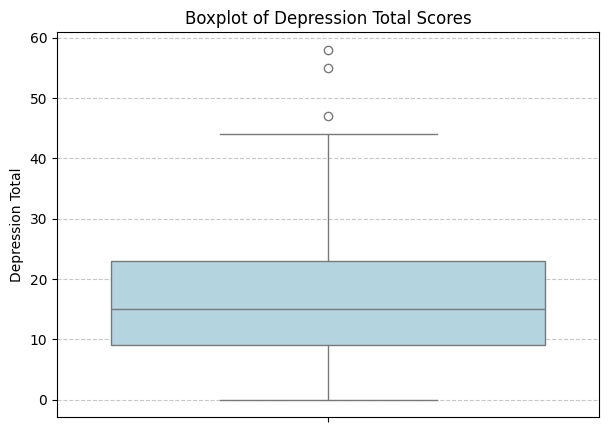

In [398]:
plt.figure(figsize=(7, 5))
sns.boxplot(y=df['depression_Total'], color='lightblue')
plt.title('Boxplot of Depression Total Scores')
plt.ylabel('Depression Total')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


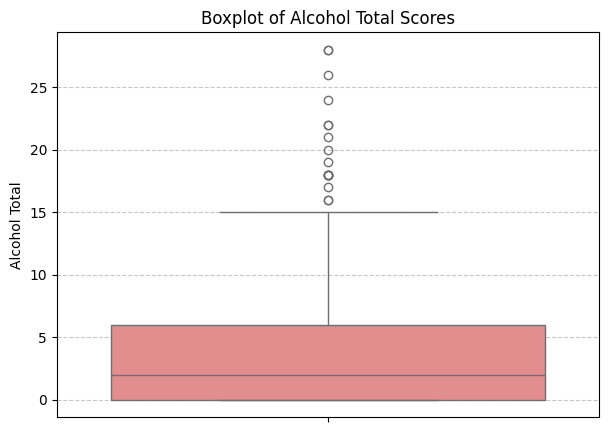

In [399]:
# Create boxplot for Alcohol_total
plt.figure(figsize=(7, 5))
sns.boxplot(y=df['Alcohol_total'], color='lightcoral')
plt.title('Boxplot of Alcohol Total Scores')
plt.ylabel('Alcohol Total')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

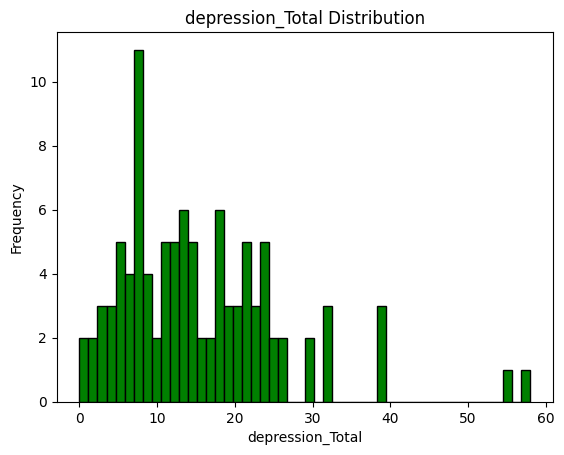

In [400]:
plt.hist(df["depression_Total"].head(100),bins=50, color='green', edgecolor='black')
plt.xlabel("depression_Total")
plt.ylabel("Frequency")
plt.title("depression_Total Distribution")
plt.show()


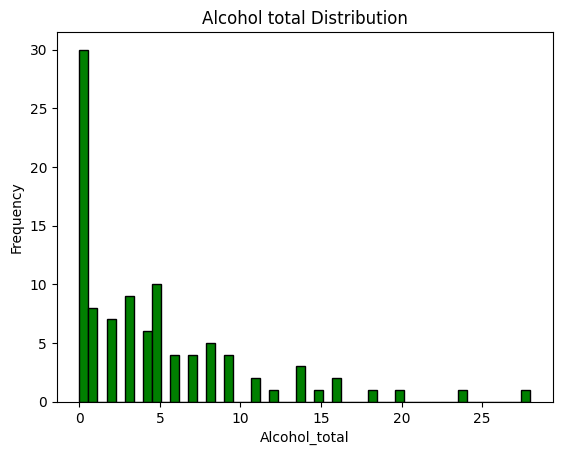

In [401]:
plt.hist(df["Alcohol_total"].head(100),bins=50, color='green', edgecolor='black')
plt.xlabel("Alcohol_total")
plt.ylabel("Frequency")
plt.title("Alcohol total Distribution")
plt.show()


# **Data Visualization**

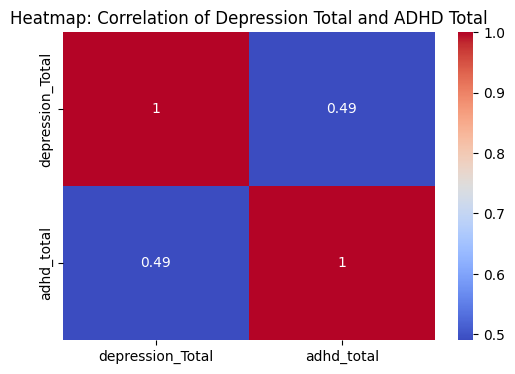

In [402]:
#Heatmap

corr_matrix = df[['depression_Total', 'adhd_total']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap: Correlation of Depression Total and ADHD Total')
plt.show()

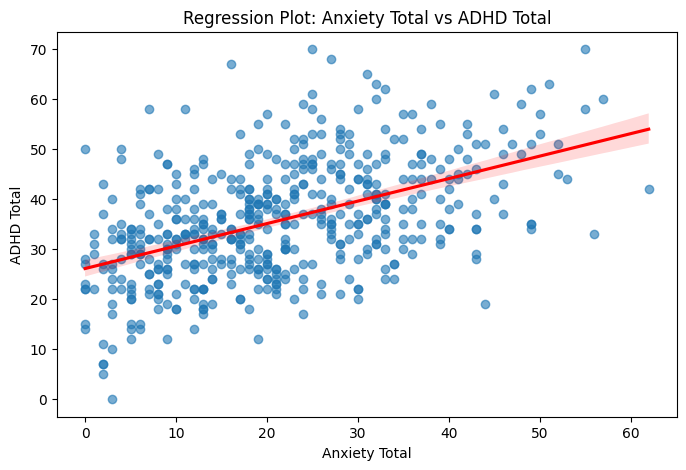

In [403]:
#Regression Plot

plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Anexity_total', y='adhd_total', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Regression Plot: Anxiety Total vs ADHD Total')
plt.xlabel('Anxiety Total')
plt.ylabel('ADHD Total')
plt.show()

<ipython-input-404-fc761dda3807>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Previous_state', y='adhd_total', palette='pastel')


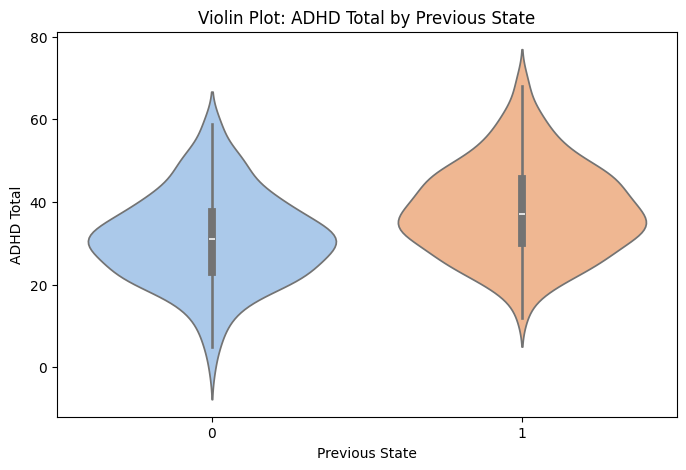

In [404]:
#Violin Plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Previous_state', y='adhd_total', palette='pastel')
plt.title('Violin Plot: ADHD Total by Previous State')
plt.xlabel('Previous State')
plt.ylabel('ADHD Total')
plt.show()


#Data Mining



In [405]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                             age       sex  Previous_state  depression_Total  \
age                     1.000000  0.162463       -0.024330         -0.038343   
sex                     0.162463  1.000000       -0.062144         -0.004539   
Previous_state         -0.024330 -0.062144        1.000000          0.363586   
depression_Total       -0.038343 -0.004539        0.363586          1.000000   
Alcohol_total           0.035875  0.158202        0.161927          0.107224   
aas1_total              0.139144 -0.004444       -0.019497         -0.239370   
University_Performance -0.004590 -0.043795       -0.000260         -0.152833   
adhd_total             -0.041180  0.082419        0.288635          0.490354   
Anexity_total           0.007875 -0.086025        0.402591          0.661001   

                        Alcohol_total  aas1_total  University_Performance  \
age                          0.035875    0.139144               -0.004590   
sex                          0.158202   -0.00

In [406]:
# Extract correlations with 'adhd_total'
adhd_correlation = correlation_matrix['adhd_total'].sort_values(ascending=False)
print(adhd_correlation)


adhd_total                1.000000
Anexity_total             0.498303
depression_Total          0.490354
Previous_state            0.288635
Alcohol_total             0.171958
sex                       0.082419
University_Performance   -0.020268
age                      -0.041180
aas1_total               -0.145480
Name: adhd_total, dtype: float64


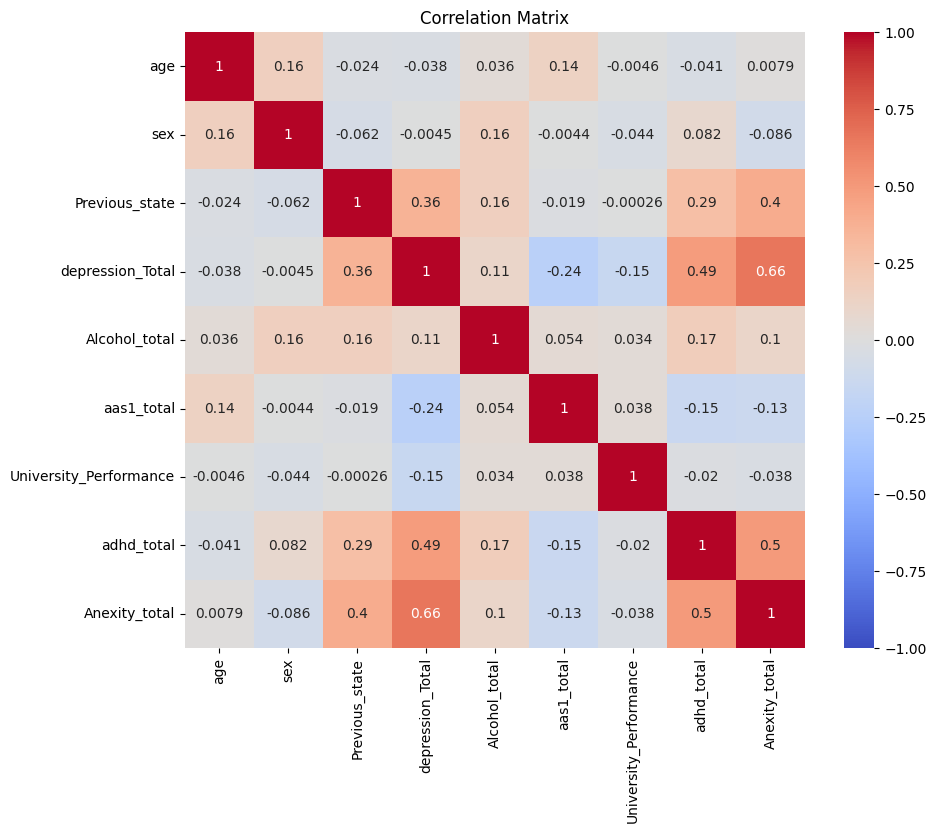

In [407]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-408-91cfb42dd0be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adhd_correlation.index, y=adhd_correlation.values, palette='coolwarm')


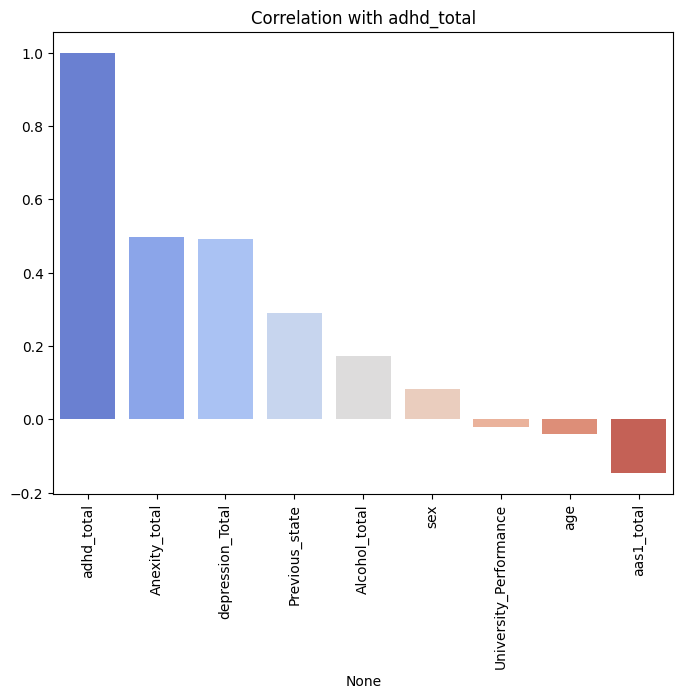

In [408]:
#bar plot that visualizes the correlation between different features
plt.figure(figsize=(8, 6))
sns.barplot(x=adhd_correlation.index, y=adhd_correlation.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation with adhd_total')
plt.show()


In [409]:
# Create a new column in the dataset to classify adhd_total into categories
def classify_adhd(score):
    if score <= 16:
        return 'Unlikely'
    elif 17 <= score <= 23:
        return 'Likely'
    else:
        return 'Highly Likely'

# Apply the classification function
df['adhd_category'] = df['adhd_total'].apply(classify_adhd)

# Encoding Categories into Numeric Values
category_mapping = {'Unlikely': 0, 'Likely': 1, 'Highly Likely': 2}
df['adhd_category_encoded'] = df['adhd_category'].map(category_mapping)

#Defining Features (X) and Target (y) for Machine Learning
X = df.drop(columns=['adhd_total', 'adhd_category', 'adhd_category_encoded'])
y = df['adhd_category_encoded']



### Check if the Dataset is Imbalanced

adhd_category_encoded
2    433
1     57
0     16
Name: count, dtype: int64


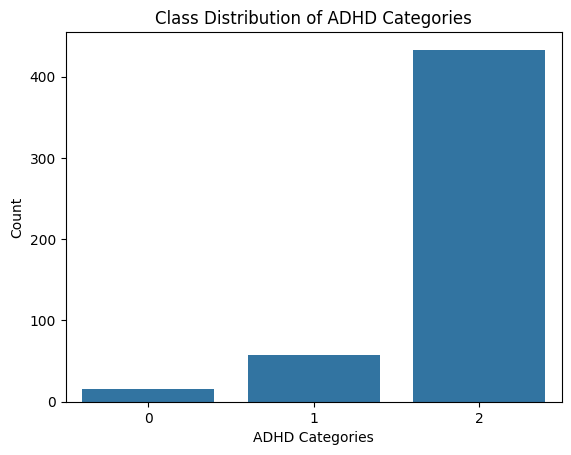

In [410]:
# Check class distribution
class_distribution = df['adhd_category_encoded'].value_counts()
print(class_distribution)

# Plot class distribution
sns.countplot(x='adhd_category_encoded', data=df)
plt.title('Class Distribution of ADHD Categories')
plt.xlabel('ADHD Categories')
plt.ylabel('Count')
plt.show()




- oversampling technique used to address class imbalance in datasets. SMOTE (Synthetic Minority Over-sampling Technique)


In [411]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
from collections import Counter
print("Class Distribution After SMOTE:", Counter(y_resampled))




Class Distribution After SMOTE: Counter({1: 433, 2: 433, 0: 433})


### Spliting data

In [412]:
from sklearn.model_selection import train_test_split

# Split the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1039, 8)
Testing set size: (260, 8)


In [413]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Training and Evaluation**

In [414]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                           Accuracy  Precision    Recall  F1-Score
Logistic Regression        0.719231   0.718971  0.719231  0.716409
Decision Tree              0.830769   0.835503  0.830769  0.829653
Random Forest              0.880769   0.888990  0.880769  0.878279
Support Vector Classifier  0.803846   0.805943  0.803846  0.802798
Gradient Boosting          0.846154   0.856825  0.846154  0.845001


Hyperparameter Tuning for Random Forest  

In [415]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search for Random Forest
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best Parameters and Model Performance
print("Best Parameters Found:", random_search.best_params_)
best_rf_model = random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
print("Best Random Forest Accuracy after Tuning:", accuracy)

Best Parameters Found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Best Random Forest Accuracy after Tuning: 0.8846153846153846


##Evaluate the Tuned Model

Confusion Matrix: This will help you visualize how well the model performs in terms of true positives, true negatives, false positives, and false negatives.



Confusion Matrix:
[[83  3  0]
 [ 2 80  5]
 [ 7 13 67]]


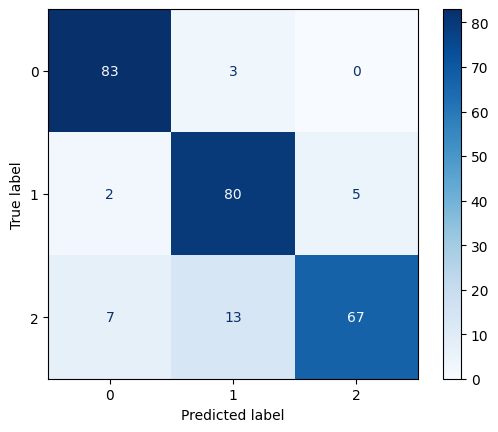

In [416]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

- Class 0 (Unlikely): 83 correct predictions, 3 misclassified as "Likely"
- Class 1 (Likely): 80 correct predictions, 2 misclassified as "Unlikely" , 5 misclassified as "Highly Likely"
- Class 2 (Highly Likely): 67 correct predictions, 7 misclassified as "Unlikely" and 13 misclassified as "Likely"



##Classification Report:
- It provides precision, recall, f1-score, and support for each class in your classification task.

In [417]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.90      0.97      0.93        86
           1       0.83      0.92      0.87        87
           2       0.93      0.77      0.84        87

    accuracy                           0.88       260
   macro avg       0.89      0.88      0.88       260
weighted avg       0.89      0.88      0.88       260



For Multiclass Classification:
  - One-vs-Rest (OvR) Approach for ROC: my model appears to be a multiclass classification model. also can compute a separate **Receiver Operating Characteristic (ROC)** Curve for each class by using a One-vs-Rest strategy.

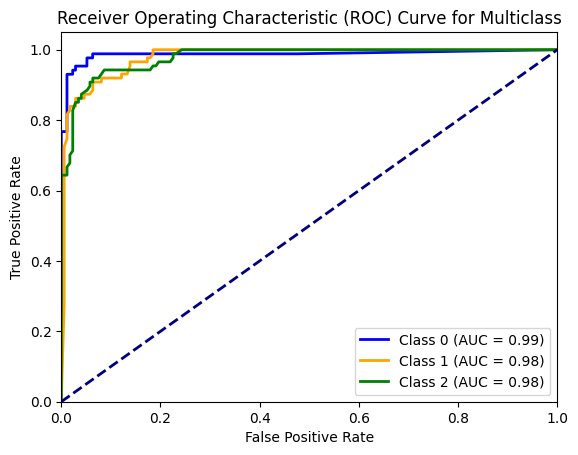

In [418]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # adjust classes according to your dataset
y_pred_prob = best_rf_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
n_classes = y_test_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

#One-vs-Rest (OvR)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'orange', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


**Feature** **Importance**

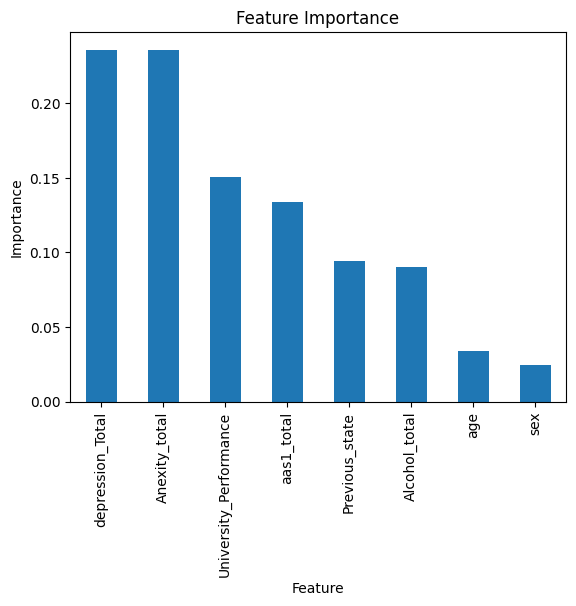

In [419]:
importances = best_rf_model.feature_importances_

# List of feature names based on your dataset
feature_names = ['age', 'sex', 'Previous_state', 'depression_Total',
                 'Alcohol_total', 'aas1_total', 'University_Performance', 'Anexity_total']

# Create a DataFrame to hold the feature names and their corresponding importance scores
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
feature_importance.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


In [420]:
import pickle

# Ensure the best model is correctly assigned
best_model = best_rf_model

# Save the trained model
with open("best_random_forest_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as 'best_random_forest_model.pkl'.")

Model saved as 'best_random_forest_model.pkl'.


In [421]:
import pickle

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [422]:
pip install gradio

In [424]:
import pickle
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained model and scaler
with open("best_random_forest_model.pkl", "rb") as f:
    best_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

print("Model and scaler loaded successfully")

# Map the numeric predictions to class names
category_mapping = {0: "Unlikely", 1: "Likely", 2: "Highly Likely"}

# Feature columns (must match training feature order)
feature_columns = [
    "age", "sex", "Previous_state", "depression_Total", "Alcohol_total",
    "aas1_total", "University_Performance",
    "Anexity_total"
]

def predict_adhd_category(age, sex, previous_state, depression_total, alcohol_total,
                          aas1_total, university_performance, anxiety_total
                          ):
    try:
        # Prepare input data
        input_data = pd.DataFrame([[age, sex, previous_state, depression_total, alcohol_total,
                                    aas1_total, university_performance,
                                    anxiety_total]], columns=feature_columns)

        # Apply StandardScaler (ensure input matches training scaling)
        input_data_scaled = scaler.transform(input_data)

        # Predict ADHD category
        adhd_category = best_model.predict(input_data_scaled)
        category_name = category_mapping.get(adhd_category[0], "Unknown")  # Map numeric value to category name

        return f"Predicted ADHD Category: {category_name}"

    except Exception as e:
        return f"Error: {e}"

# Create Gradio interface
iface = gr.Interface(
    fn=predict_adhd_category,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio(choices=[0, 1, 2], label="Sex (0=Female, 1=Male, 2=Other)"),
        gr.Radio(choices=[0, 1], label="Previous State (0=No, 1=Yes)"),
        gr.Number(label="Depression Total"),
        gr.Number(label="Alcohol Total"),
        gr.Number(label="AAS1 Total"),
        gr.Number(label="University Performance"),
        gr.Number(label="Anxiety Total"),

    ],
    outputs="text",
    title="ADHD Category Predictor"
)

# Launch the interface
iface.launch()


Model and scaler loaded successfully
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c4e5fea64dd9b1155e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
